In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [26]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv('./Data/stud.csv')


In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [23]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [24]:
X = preprocessor.fit_transform(X)


In [25]:
X.shape

(1000, 19)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [29]:
print(X_train.shape)
print(X_test.shape)

(800, 19)
(200, 19)


In [30]:
def eval_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r_square = r2_score(true, pred)
    return mae, rmse, r_square

In [37]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbours Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGB Regressor' : XGBRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(verbose=False),
    'Ada Boost' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #pred
    y_train_predict = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #eval
    model_train_mae, model_train_rmse, model_train_r2 = eval_model(y_train, y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = eval_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('Train RMSE', model_train_rmse)
    print('Train MAE', model_train_mae)
    print('Train R2', model_train_r2)

    print('-' * 25)

    print('Model performance for training set')
    print('Test RMSE', model_test_rmse)
    print('Test MAE', model_test_mae)
    print('Test R2', model_test_r2)

    r2_list.append(model_test_r2)

    print('=' * 30)
    print('\n')


Linear Regression
Model performance for training set
Train RMSE 5.300442964720066
Train MAE 4.219856872558593
Train R2 0.8812137184404687
-------------------------
Model performance for training set
Test RMSE 5.500825209402008
Test MAE 4.446715087890625
Test R2 0.8479913856595515


Lasso
Model performance for training set
Train RMSE 6.523650243937924
Train MAE 5.162453440205609
Train R2 0.8200618321681776
-------------------------
Model performance for training set
Test RMSE 6.754414002367205
Test MAE 5.264016023625289
Test R2 0.7708141172613194


Ridge
Model performance for training set
Train RMSE 5.292757858489015
Train MAE 4.2070136311968
Train R2 0.8815579249164356
-------------------------
Model performance for training set
Test RMSE 5.478869304588225
Test MAE 4.4189519053902195
Test R2 0.8492024134400655


K-Neighbours Regressor
Model performance for training set
Train RMSE 5.892894025858602
Train MAE 4.6895
Train R2 0.8531752674541994
-------------------------
Model performance 

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.849202
0,Linear Regression,0.847991
7,Cat Boost Regressor,0.815400
5,Random Forest Regressor,0.789762
8,Ada Boost,0.785149
1,Lasso,0.770814
3,K-Neighbours Regressor,0.756615
6,XGB Regressor,0.747964
4,Decision Tree,0.611891


In [39]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.80


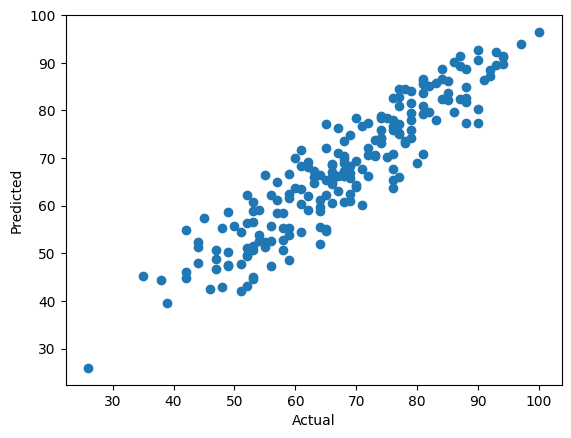

In [40]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

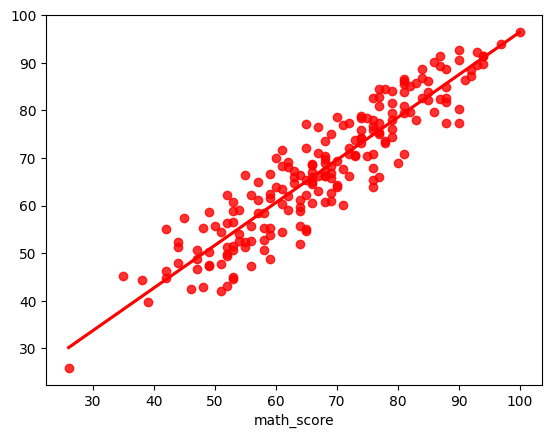

In [41]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
778,72,70.756836,1.243164
334,83,85.794434,-2.794434
271,58,50.691650,7.308350
802,87,91.356689,-4.356689
216,83,78.035889,4.964111
...,...,...,...
371,45,57.476807,-12.476807
411,84,86.713623,-2.713623
644,70,69.343750,0.656250
981,81,83.777832,-2.777832
